### Sara lagt til:

In [154]:
import pandas as pd

In [155]:

import numpy as np
import matplotlib.pyplot as plt
from co2_forcing_AR6 import co2_forcing_AR6
from ch4_forcing_AR6 import ch4_forcing_AR6
#from n2o_forcing_AR6 import n2o_forcing_AR6

## Hva er dette?

In [156]:
# All from table 7.8
co2_erf_AR6 = 2.16
ch4_erf_AR6 = 0.54
n2o_erf_AR6 = 0.21
hc_erf_AR6 = 0.41
o3_erf_AR6 = 0.47
ari_erf_AR6 = -0.22
aci_erf_AR6 = -0.84


co2_1850 = 286.7 # LLGHG_history_AR6_v8a
co2_2014 = 397.12
ch4_1850 = 807.6 # LLGHG_history_AR6_v8a
ch4_2014 = 1822.88 # 
n2o_1850 = 272.5 # LLGHG_history_AR6_v8a
n2o_2014 = 327.37

#Rapid adjustments to WMGHGs
co2_ra = 0.05 # FGD
ch4_ra = -0.14 # FGD
n2o_ra = 0.07 # FGD


## Hva er dette?

In [157]:
tot_em_co2 = 582. # Cumulative C since 1850 - from MAGICC input files

ch4_erf = ch4_forcing_AR6(ch4_2014, ch4_1850, n2o_1850)*(1+ch4_ra)
#n2o_erf = n2o_forcing_AR6(n2o_2014, n2o_1850, co2_1850, ch4_1850)*(1+n2o_ra)
hc_erf = 0.40 # 1850-2014 Interpolated between 2011 (0.39) and 2019 (0.41)

In [158]:
erf_bc = 0.15 # Thornhill et al.
irf_ari = -0.3 # AR6 FGD 1750-2014
erf_aci = -1.0 # AR6 FGD 1750-2014

In [159]:
ncols = 5 # columns in csv file
nspec = 9 # number of species
dtype = 'U12'+', f8'*ncols
data = np.genfromtxt('attribution_input.csv', delimiter=',', filling_values=0,
                        names=True, dtype=(dtype))
data_sd = np.genfromtxt('attribution_input_sd.csv', delimiter=',', filling_values=0,
                        names=True, dtype=(dtype))

In [160]:
fn_input = 'attribution_input.csv'
fn_input_sd = 'attribution_input_sd.csv'
inp_df = pd.read_csv(fn_input, index_col=0)
inp_sd_df = pd.read_csv(fn_input_sd, index_col=0)
inp_df

,o3_rf,lifech4,erf,ari,ac
# Experiment,,,,,
CH4,0.1393461,0.206666667,0.754322567,-0.0055,0.017625
N2O,0.03022398,-0.035,0.268515636,-0.004333333,0.040666667
HC,-0.11201344,-0.0494,0.178761561,-0.01675,-0.016666667
NOx,0.1988048,-0.343166667,0.139344038,-0.019,-0.013833333
VOC,0.109047333,0.164833333,0.090191971,-0.005333333,0.0085
SO2,0,0,-1.03125,-0.3625,-0.545714286
OC,0,0,-0.255714286,-0.09,-0.106166667
BC,0,0,0.14875,0.2775,-0.048571429
NH3,0,0,-0.07,0,0


In [161]:
units = inp_df.loc['Units']
units
inp_df = inp_df.drop('Units').astype(float)

In [162]:
inp_sd_df = inp_sd_df.drop('Units').astype(float)
inp_sd_df 

,o3_rf_sd,lifech4_sd,erf_sd,ari_sd,ac_sd
# Experiment,,,,,
CH4,0.028528,0.041820,0.102395,0.004555,0.092581
N2O,0.012021,0.027267,0.076129,0.004190,0.042169
HC,0.060436,0.030683,0.173366,0.004085,0.049554
NOx,0.068652,0.075232,0.130933,0.009416,0.057188
VOC,0.044427,0.059533,0.130796,0.010499,0.098979
SO2,0.000000,0.000000,0.364226,0.127549,0.287693
OC,0.000000,0.000000,0.091473,0.034641,0.100229
BC,0.000000,0.000000,0.168184,0.094703,0.136801
NH3,0.000000,0.000000,0.010000,0.000000,0.000000


In [163]:
rfo3 = inp_df['o3_rf']
rfo3_sd = inp_sd_df['o3_rf_sd']
lifech4 = inp_df['lifech4']
lifech4_sd = inp_sd_df['lifech4_sd']
ari = inp_df['ari']
ari_sd = inp_sd_df['ari_sd']
aci = inp_df['ac']
aci_sd = inp_sd_df['ac_sd']
erf = inp_df['erf']
erf_sd = inp_sd_df['erf_sd']

rfo3 = data['o3_rf']
rfo3_sd = data_sd['o3_rf_sd']
lifech4 = data['lifech4']
lifech4_sd = data_sd['lifech4_sd']
ari = data['ari']
ari_sd = data_sd['ari_sd']
ac = data['ac']
ac_sd = data_sd['ac_sd']
erf = data['erf']
erf_sd = data_sd['erf_sd']

In [164]:
i_ch4 = np.where(data['Experiment']=='CH4')[0][0]
i_nox = np.where(data['Experiment']=='NOx')[0][0]
i_voc = np.where(data['Experiment']=='VOC')[0][0]
i_n2o = np.where(data['Experiment']=='N2O')[0][0]
i_hc = np.where(data['Experiment']=='HC')[0][0]

In [165]:
i_gas = np.array([i_ch4, i_n2o, i_hc, i_nox, i_voc])
i_non_ch4 = np.array([i_n2o, i_hc, i_nox, i_voc])

In [166]:
i_gas

array([0, 1, 2, 3, 4])

In [167]:
labs_gas = ['CH4','N2O','HC','NOx','VOC']
labs_non_ch4 = ['N2O','HC','NOx','VOC']

In [168]:
total_o3 = rfo3.sum()
total_o3

0.36540877299999996

In [169]:
alpha = 1.30 # From chapter 6

In [170]:
lifech4#['CH4']

# Experiment
CH4    0.206667
N2O   -0.035000
HC    -0.049400
NOx   -0.343167
VOC    0.164833
SO2    0.000000
OC     0.000000
BC     0.000000
NH3    0.000000
Name: lifech4, dtype: float64

In [171]:
#print(alpha)
ch4 = ch4_2014*(1+lifech4)**alpha
inp_df['ch4'] = ch4
inp_df
#ch4

,o3_rf,lifech4,erf,ari,ac,ch4
# Experiment,,,,,,
CH4,0.139346,0.206667,0.754323,-0.005500,0.017625,2327.135068
N2O,0.030224,-0.035000,0.268516,-0.004333,0.040667,1740.378010
HC,-0.112013,-0.049400,0.178762,-0.016750,-0.016667,1706.692315
NOx,0.198805,-0.343167,0.139344,-0.019000,-0.013833,1055.479541
VOC,0.109047,0.164833,0.090192,-0.005333,0.008500,2222.803168
SO2,0.000000,0.000000,-1.031250,-0.362500,-0.545714,1822.880000
OC,0.000000,0.000000,-0.255714,-0.090000,-0.106167,1822.880000
BC,0.000000,0.000000,0.148750,0.277500,-0.048571,1822.880000
NH3,0.000000,0.000000,-0.070000,0.000000,0.000000,1822.880000


In [172]:
ch4_sd = (ch4-ch4_2014)*lifech4_sd/lifech4
#ch4_sd = np.where(lifech4 == 0, 0., ch4_sd)

ch4_sd[lifech4==0] = 0

inp_sd_df['ch4_sd'] = ch4_sd
inp_sd_df

,o3_rf_sd,lifech4_sd,erf_sd,ari_sd,ac_sd,ch4_sd
# Experiment,,,,,,
CH4,0.028528,0.041820,0.102395,0.004555,0.092581,102.037767
N2O,0.012021,0.027267,0.076129,0.004190,0.042169,64.274226
HC,0.060436,0.030683,0.173366,0.004085,0.049554,72.165474
NOx,0.068652,0.075232,0.130933,0.009416,0.057188,168.235527
VOC,0.044427,0.059533,0.130796,0.010499,0.098979,144.439804
SO2,0.000000,0.000000,0.364226,0.127549,0.287693,0.000000
OC,0.000000,0.000000,0.091473,0.034641,0.100229,0.000000
BC,0.000000,0.000000,0.168184,0.094703,0.136801,0.000000
NH3,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000


In [173]:
i_ch4

0

In [174]:
rfo3.loc['CH4']

0.1393461

In [175]:
rfo3[i_ch4]

0.1393461

In [176]:
rfo3_sd['CH4']

0.028527553

In [177]:
rfo3perch4

0.00013724893625403827

In [178]:
ch4

# Experiment
CH4    2327.135068
N2O    1740.378010
HC     1706.692315
NOx    1055.479541
VOC    2222.803168
SO2    1822.880000
OC     1822.880000
BC     1822.880000
NH3    1822.880000
Name: lifech4, dtype: float64

In [179]:
# Ozone primary mode            
rfo3perch4 = rfo3.loc['CH4']/(ch4_2014-ch4_1850) # Use CH4 expt
#rfo3perch4_sd = rfo3_sd[i_ch4]/(ch4_2014-ch4_1850) # Use CH4 expt
rfo3perch4_sd = rfo3_sd['CH4']/(ch4_2014-ch4_1850) # Use CH4 expt
rfo3_prime = rfo3perch4*(ch4-ch4_2014)
rfo3_prime_sd = np.sqrt(
        (rfo3perch4_sd*(ch4-ch4_2014))**2+
# add 15% uncertainty in radiative transfer - from Ragnhild
        (rfo3perch4*(ch4-ch4_2014)*0.15)**2)

In [180]:
rfo3_prime

# Experiment
CH4    0.069208
N2O   -0.011323
HC    -0.015947
NOx   -0.105325
VOC    0.054889
SO2    0.000000
OC     0.000000
BC     0.000000
NH3    0.000000
Name: lifech4, dtype: float64

In [181]:
i_non_ch4

array([1, 2, 3, 4])

In [182]:
labs_non_ch4

['N2O', 'HC', 'NOx', 'VOC']

In [183]:
np.array(rfo3_prime_sd)[[i_non_ch4]]

/home/sarambl/miniconda3/envs/rcmip_ch6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([0.0028738 , 0.00404718, 0.02673097, 0.01393058])

In [184]:
rfo3_prime

# Experiment
CH4    0.069208
N2O   -0.011323
HC    -0.015947
NOx   -0.105325
VOC    0.054889
SO2    0.000000
OC     0.000000
BC     0.000000
NH3    0.000000
Name: lifech4, dtype: float64

In [185]:
-np.sum(rfo3_prime[labs_non_ch4])

0.07770581377827238

In [186]:
# Set ch4 o3 prime to be minus sum of non-ch4 terms
# - ensures total sum of prime terms is zero
#rfo3_prime[i_ch4] = -np.sum(rfo3_prime[i_non_ch4])
rfo3_prime.loc['CH4'] = -np.sum(rfo3_prime[labs_non_ch4])
#rfo3_prime_sd[i_ch4] = np.sqrt(np.sum(np.square(rfo3_prime_sd[[i_non_ch4]])))
rfo3_prime_sd.loc['CH4'] = np.sqrt(np.sum(np.square(rfo3_prime_sd[labs_non_ch4])))
rfo3_prime

# Experiment
CH4    0.077706
N2O   -0.011323
HC    -0.015947
NOx   -0.105325
VOC    0.054889
SO2    0.000000
OC     0.000000
BC     0.000000
NH3    0.000000
Name: lifech4, dtype: float64

In [188]:
nspec

9

In [189]:
# CH4 forcing
rfch4 = pd.Series(np.zeros(nspec), index=inp_df.index)
rfch4_sd = np.zeros(nspec)


# Experiment
CH4    0.0
N2O    0.0
HC     0.0
NOx    0.0
VOC    0.0
SO2    0.0
OC     0.0
BC     0.0
NH3    0.0
dtype: float64

In [10]:
#rfch4 = np.zeros(nspec)
#rfch4_sd = np.zeros(nspec)

for ispec in np.arange(nspec):
    rfch4[ispec] = \
        ch4_forcing_AR6(ch4[ispec], ch4_2014, n2o_2014)*\
        (1+ch4_ra)
    rfch4_sd[ispec] = \
        ch4_forcing_AR6(ch4[ispec]+ch4_sd[ispec], ch4_2014, n2o_2014)*\
        (1+ch4_ra)-rfch4[ispec]
# rfch4 due to ch4 is minus sum of non-ch4 terms
# - ensures total sum of rfch4 changes is zero
rfch4[i_ch4] = -np.sum(rfch4[i_non_ch4])
rfch4_sd[i_ch4] = np.sqrt(np.sum(np.square(rfch4_sd[[i_non_ch4]])))
# Add in 14% spectral uncertainty
rfch4_sd=np.sqrt((rfch4*0.14)**2+(rfch4_sd)**2)

/home/sarambl/miniconda3/envs/rcmip_ch6/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [12]:
em_co2 = np.zeros(nspec)
em_co2[[i_ch4, i_hc, i_voc]] = [6.6, 0.02, 26.]
# From MAGICC input files
#  CH4 HC VOC, CO CO2 scalings applied of 75%, 100%, 50%, 100%
# Assume 88% of CH4 emitted oxidised (12% remains as CH4)

# Assume can attributed present day CO2 change by scaling cumulative emissions
co2 = (em_co2/tot_em_co2)*(co2_2014-co2_1850)
rfco2=np.zeros(nspec)
for ispec in np.arange(nspec):
    rfco2[ispec] = \
        co2_forcing_AR6(co2_2014, co2_2014-co2[ispec], n2o_2014)*\
        (1+co2_ra)
# co2 contribution from direct co2 emissions
rfco2_co2 = co2_forcing_AR6(co2_2014, co2_1850, n2o_2014)*(1+co2_ra) \
            -np.sum(rfco2) # Subtract off non-co2 carbon contributions

#Set up WMGHG direct ERFs
rfghg = np.zeros(nspec)
rfghg[i_ch4] = ch4_erf
#rfghg[i_n2o] = n2o_erf
rfghg[i_hc] = hc_erf

In [13]:
#Aerosols
#Set indicies
i_bc = np.where(data['Experiment']=='BC')[0][0]
i_oc = np.where(data['Experiment']=='OC')[0][0]
i_so2 = np.where(data['Experiment']=='SO2')[0][0]
i_nh3 = np.where(data['Experiment']=='NH3')[0][0]
i_aer = np.array([i_bc, i_oc, i_so2, i_nh3]) # all aerosols
i_scat = np.array([i_oc, i_so2, i_nh3]) # scattering aerosols

#Set aerosol ari to be erf-ac to ensure components add to erf
ari[i_aer] = erf[i_aer]-ac[i_aer]
ari_sd[i_aer] = np.sqrt(erf_sd[i_aer]**2 +ac_sd[i_aer]**2)

In [14]:
# scale SO2+OC to get total ari

irf_ari_scat = irf_ari-ari[i_bc] # Set non-BC ari to 7.3.3 FGD
ari_scat = np.sum(ari[i_scat])
ari[i_scat] = ari[i_scat]*irf_ari_scat/ari_scat 
ari_sd[i_scat] = ari_sd[i_scat]*irf_ari_scat/ari_scat

# scale aci to get total aci from 7.3.3
total_aci = np.sum(ac[i_aer])
ac[i_aer] = ac[i_aer]*erf_aci/total_aci
ac_sd[i_aer] = ac_sd[i_aer]*erf_aci/total_aci


#Scale everything to table 7.8
rfco2_co2 *= co2_erf_AR6/(rfco2_co2+np.sum(rfco2))

rfghg[i_ch4]  *= ch4_erf_AR6/rfghg[i_ch4]
rfch4         *= ch4_erf_AR6/rfghg[i_ch4]
rfch4_sd      *= ch4_erf_AR6/rfghg[i_ch4]
rfo3_prime    *= ch4_erf_AR6/rfghg[i_ch4]
rfo3_prime_sd *= ch4_erf_AR6/rfghg[i_ch4]

rfghg[i_n2o] *= n2o_erf_AR6/rfghg[i_n2o]

rfghg[i_hc] *= hc_erf_AR6/rfghg[i_hc]

rfo3    *= o3_erf_AR6/np.sum(rfo3)
rfo3_sd *= o3_erf_AR6/np.sum(rfo3)

ari *= ari_erf_AR6/np.sum(ari)
ari_sd *= ari_erf_AR6/np.sum(ari)

ac[i_aer] *= aci_erf_AR6/np.sum(ac[i_aer])
ac_sd[i_aer] *= aci_erf_AR6/np.sum(ac[i_aer])

rfghg_sd = rfghg*0.14 # assume 14% for all WMGHGs

table = np.zeros(nspec+1,
                     dtype={'names':
                            ['Species', 'CO2', 'GHG', 'CH4_lifetime', 'O3',
                             'O3_prime', 'Strat_H2O', 'Aerosol', 'Cloud', 'Total'],
                             'formats':
                                 ['U20', 'f8', 'f8', 'f8', 'f8',
                                  'f8', 'f8', 'f8', 'f8', 'f8']})
table_sd = np.zeros(nspec+1,
                     dtype={'names':
                            ['Species', 'CO2_sd', 'GHG_sd', 'CH4_lifetime_sd',
                             'O3_sd', 'O3_prime_sd', 'Strat_H2O_sd',
                             'Aerosol_sd', 'Cloud_sd', 'Total_sd'],
                             'formats':
                                 ['U20', 'f8', 'f8', 'f8', 'f8',
                                  'f8', 'f8', 'f8', 'f8', 'f8']})

/home/sarambl/miniconda3/envs/rcmip_ch6/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/home/sarambl/miniconda3/envs/rcmip_ch6/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [15]:
table['Species'][0] = 'CO2'
table['CO2'][0] = rfco2_co2
table['Total'][0] = rfco2_co2
table_sd['Species'][0] = 'CO2'
table_sd['CO2_sd'][0] = rfco2_co2*0.12 # 12% uncertainty
table_sd['Total_sd'][0] = rfco2_co2*0.12

for ispec in np.arange(nspec):
    table['Species'][ispec+1] = data['Experiment'][ispec]
    table['CO2'][ispec+1] = rfco2[ispec]
    table['GHG'][ispec+1] = rfghg[ispec]
    table['CH4_lifetime'][ispec+1] = rfch4[ispec]
    table['O3'][ispec+1] = rfo3[ispec]
    table['O3_prime'][ispec+1] = rfo3_prime[ispec]
    table['Aerosol'][ispec+1] = ari[ispec]
    table['Cloud'][ispec+1] = ac[ispec]
    table['Total'][ispec+1] = np.sum([rfco2[ispec], rfghg[ispec], rfch4[ispec],
         rfo3[ispec], rfo3_prime[ispec], ari[ispec], ac[ispec]])
    table_sd['Species'][ispec+1] = data['Experiment'][ispec]
    table_sd['CO2_sd'][ispec+1] = rfco2[ispec]*0.12
    table_sd['GHG_sd'][ispec+1] = rfghg_sd[ispec]
    table_sd['CH4_lifetime_sd'][ispec+1] = rfch4_sd[ispec]
    table_sd['O3_sd'][ispec+1] = rfo3_sd[ispec]
    table_sd['O3_prime_sd'][ispec+1] = rfo3_prime_sd[ispec]
    table_sd['Aerosol_sd'][ispec+1] = ari_sd[ispec]
    table_sd['Cloud_sd'][ispec+1] = ac_sd[ispec]
    table_sd['Total_sd'][ispec+1] = np.sqrt(np.sum(np.square(
            [rfco2[ispec]*0.12, rfghg_sd[ispec], rfch4_sd[ispec],
             rfo3_sd[ispec]+rfo3_prime_sd[ispec], ari_sd[ispec], ac_sd[ispec]])))
table['Strat_H2O'][i_ch4+1] = 0.05
table['Total'][i_ch4+1] += 0.05
table_sd['Strat_H2O_sd'][i_ch4+1] = 0.05
table_sd['Total_sd'][i_ch4+1] = np.sqrt(np.sum(np.square(
        [rfco2[i_ch4]*0.12, rfghg_sd[i_ch4]+rfch4_sd[i_ch4],
             rfo3_sd[i_ch4]+rfo3_prime_sd[i_ch4], 0.05,
             ari_sd[i_ch4], ac_sd[i_ch4]])))

np.savetxt("attribution_output_1750_2019.csv", table, delimiter=',',
           fmt='%15s'+9*', %8.3f',
           header=','.join(table.dtype.names))
np.savetxt("attribution_output_1750_2019.csv_sd.csv", table_sd, delimiter=',',
           fmt='%15s'+9*', %8.3f',
           header=','.join(table_sd.dtype.names))
 
    
    

[2.05755418 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[2.05755418 0.55754908        nan 0.41005309 0.         0.06949066
 0.         0.         0.         0.        ]


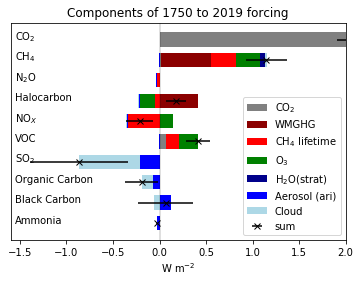

In [16]:
    
plt.figure()
width = 0.7
species =[r'CO$_2$', r'CH$_4$', r'N$_2$O', 'Halocarbon', r'NO$_X$', 'VOC', r'SO$_2$',
          'Organic Carbon', 'Black Carbon', 'Ammonia']
exp_list = \
    np.array([i_ch4, i_n2o, i_hc, i_nox, i_voc, i_so2, i_oc, i_bc, i_nh3])
ybar = np.arange(nspec+1, 0, -1)
labels = [r'CO$_2$', 'WMGHG',  r'CH$_4$ lifetime', r'O$_3$', 'Aerosol (ari)', 'Cloud']

pos_ghg = np.zeros(nspec+1)
pos_ch4 = np.zeros(nspec+1)
pos_o3 = np.zeros(nspec+1)
pos_aer = np.zeros(nspec+1)
pos_cloud = np.zeros(nspec+1)
pos_h2o = np.zeros(nspec+1)
pos_co2 = np.zeros(nspec+1)
neg_ch4 = np.zeros(nspec+1)
neg_o3 = np.zeros(nspec+1)
neg_aer = np.zeros(nspec+1)
neg_cloud = np.zeros(nspec+1)

#CO2
pos_co2[0] =rfco2_co2 ; pos_ghg[0] = pos_co2[0] ; pos_ch4[0] = pos_co2[0]
pos_o3[0]=pos_co2[0]; pos_h2o[0] = pos_co2[0]
pos_aer[0] = pos_co2[0]; pos_cloud[0] = pos_co2[0]
print(pos_ghg)
# Gases
pos_co2[i_gas+1] = rfco2[i_gas]
pos_ghg[i_gas+1] = pos_co2[i_gas+1]+rfghg[i_gas]
print(pos_ghg)
pos_ch4[i_gas+1] = pos_ghg[i_gas+1]+\
    np.maximum(rfch4[i_gas], 0.)
neg_ch4[i_gas+1] = np.minimum(rfch4[i_gas], 0.)
pos_o3[i_gas+1] = pos_ch4[i_gas+1]+\
    np.maximum(rfo3[i_gas]+rfo3_prime[i_gas], 0.)
neg_o3[i_gas+1] = neg_ch4[i_gas+1]+\
    np.minimum(rfo3[i_gas]+rfo3_prime[i_gas], 0.)
pos_h2o[i_gas+1] = pos_o3[i_gas+1]
pos_h2o[i_ch4+1] += 0.05 # AR6 FGD
pos_aer[i_gas+1] = pos_h2o[i_gas+1]+\
    np.maximum(ari[i_gas], 0.)
neg_aer[i_gas+1] = neg_o3[i_gas+1]+\
    np.minimum(ari[i_gas], 0.)
pos_cloud[i_gas+1] = pos_aer[i_gas+1]+\
    np.maximum(ac[i_gas], 0.)
neg_cloud[i_gas+1] = neg_aer[i_gas+1]+\
    np.minimum(ac[i_gas], 0.)

#Aerosols
pos_aer[i_aer+1] = np.maximum(ari[i_aer], 0.)
neg_aer[i_aer+1] = np.minimum(ari[i_aer], 0.)
pos_cloud[i_aer+1] = pos_aer[i_aer+1]+\
    np.maximum(ac[i_aer], 0.)
neg_cloud[i_aer+1] = neg_aer[i_aer+1]+\
    np.minimum(ac[i_aer], 0.)


error = np.zeros(nspec+1)
error[0] = co2[0]*0.12 # 12% uncertainty
error[i_ch4+1] = np.sqrt((rfghg_sd[i_ch4]+rfch4_sd[i_ch4])**2+ # CH4
                    (rfo3_sd[i_ch4]+rfo3_prime_sd[i_ch4])**2+  # O3
                    0.05**2+                                   # Strat H2O
                    ari_sd[i_ch4]**2+
                    ac_sd[i_ch4]**2)
error[i_non_ch4+1] = np.sqrt(rfghg_sd[i_non_ch4]**2+
                    rfch4_sd[i_non_ch4]**2+
                    (rfo3_sd[i_non_ch4]+rfo3_prime_sd[i_non_ch4])**2+
                    ari_sd[i_non_ch4]**2+
                    ac_sd[i_non_ch4]**2)
error[i_aer+1] = np.sqrt(ari_sd[i_aer]**2+
                    ac_sd[i_aer]**2)

plt.barh(ybar, pos_co2, width, color='grey', label=labels[0])
plt.barh(ybar, pos_ghg-pos_co2, width, left=pos_co2, color='darkred', label=labels[1])
plt.barh(ybar, pos_ch4-pos_ghg, width, left=pos_ghg, color='red', label=labels[2])
plt.barh(ybar, pos_o3-pos_ch4, width, left=pos_ch4, color='green', label=labels[3])
plt.barh(ybar, pos_h2o-pos_o3, width, left=pos_o3, color='darkblue', label=r'H$_2$O(strat)')
plt.barh(ybar, pos_aer-pos_h2o, width, left=pos_h2o, color='blue', label=labels[4])
plt.barh(ybar, pos_cloud-pos_aer, width, left=pos_aer, color='lightblue', label=labels[5])
plt.barh(ybar, neg_ch4, width, color='red')
plt.barh(ybar, neg_o3-neg_ch4, width, left=neg_ch4, color='green')
plt.barh(ybar, neg_aer-neg_o3, width, left=neg_o3, color='blue')
plt.barh(ybar, neg_cloud-neg_aer, width, left=neg_aer, color='lightblue')
plt.errorbar(pos_cloud+neg_cloud,ybar, marker='x', linestyle='None', color='k', label='sum', xerr=error)
plt.yticks([])
for i in np.arange(nspec+1):
    plt.text(-1.55, ybar[i], species[i])
plt.title('Components of 1750 to 2019 forcing')
plt.xlabel(r'W m$^{-2}$')
plt.xlim(-1.6, 2.0)
plt.legend(loc='lower right')
plt.axvline(x=0., color='k', linewidth=0.25)

plt.show()